# **Deep Learning**
# **CNN: DenseNets**
## **Lab 4 Assignment**

**Harsh Tomar**
**B21AI049**

### **Importing Necessary Libraries**

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch import optim

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Checking if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Choosing the CUDA device
torch.cuda.set_device(0)
print(device) # Confirming the Device

cuda


---

### **Loading DataSets**

In [ ]:
from torch.utils.data import random_split

# Set random seed for reproducibility
torch.manual_seed(42)

# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor(),
#transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-100 dataset
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Split the test set into test and validation sets
val_size = len(test_dataset) // 2
test_size = len(test_dataset) - val_size

test_dataset, val_dataset = random_split(test_dataset, [test_size, val_size])

# Create DataLoader for training, validation, and test sets
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)

# Checking the dataset sizes
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")



Files already downloaded and verified
Files already downloaded and verified
Training set size: 50000
Validation set size: 5000
Test set size: 5000


In [ ]:
# Printing the Train Dataset
print(train_dataset)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
# Printing the Train Loader Object
print(train_loader)

In [ ]:
# Class Information
print(train_loader.dataset.classes)
print('Total Classes: ', len(train_loader.dataset.classes))

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

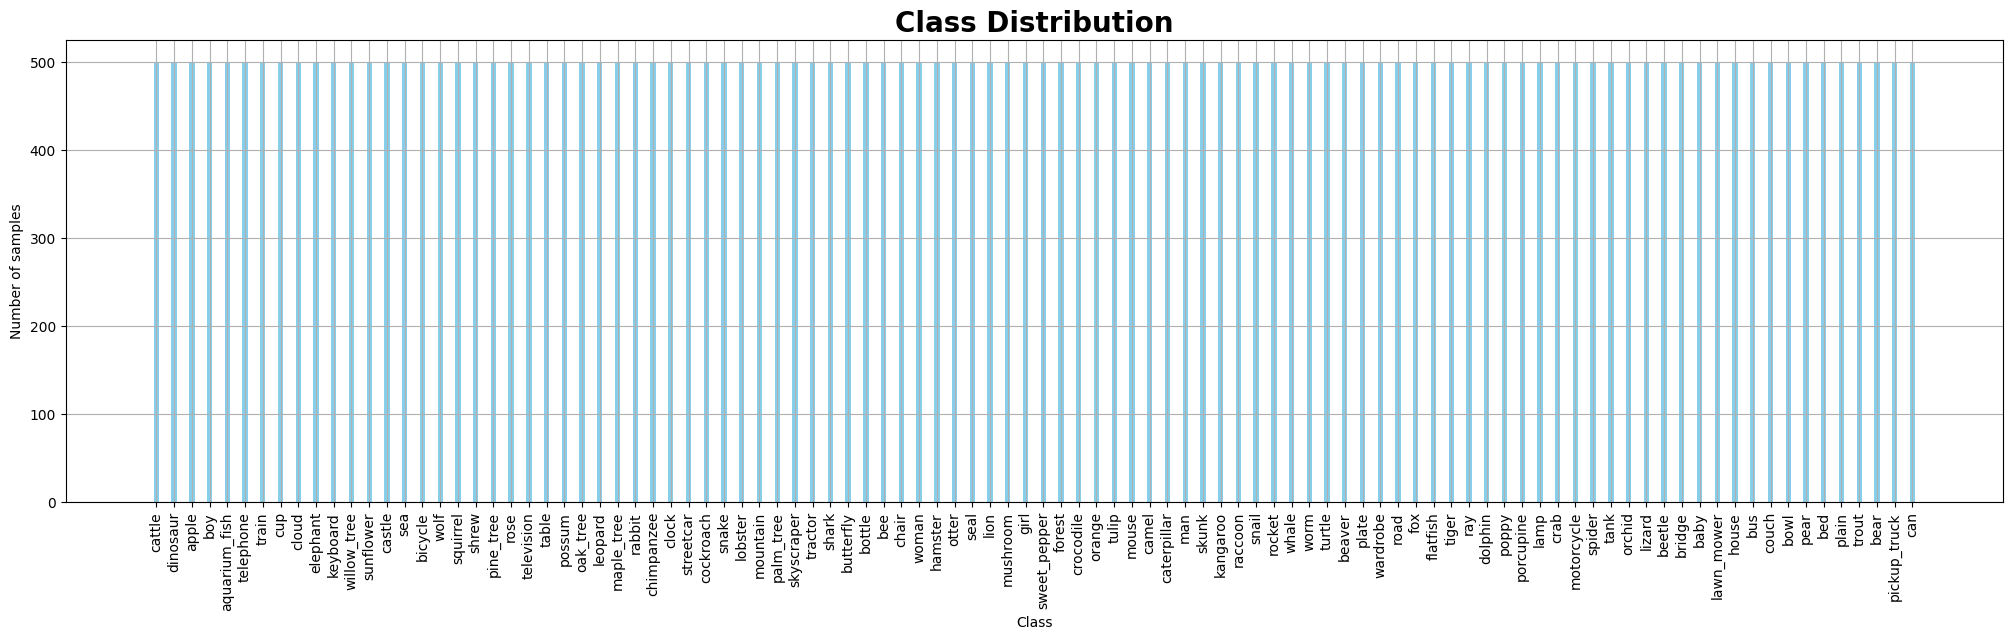

In [ ]:
# Let's do some exploration of the dataset

# Class Distribution


# Get the class distribution
class_distribution = {}
for image, label in train_loader.dataset:
    class_name = train_loader.dataset.classes[label]
    if class_name not in class_distribution:
        class_distribution[class_name] = 0
    class_distribution[class_name] += 1

# Plotting the class distribution
plt.figure(figsize=(25, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color = 'skyblue',
 width = 0.3)

plt.xticks(rotation=90)

plt.xlabel('Class')

plt.ylabel('Number of samples')

plt.title('Class Distribution', fontsize=20, fontweight='bold')
plt.grid(True)
plt.show()


In [ ]:

image, label = train_loader.dataset[0]
print('image shape:', image.shape)
print('label:', label)

print('Image in Tensor Form...')
print(image)


image shape: torch.Size([3, 32, 32])
label: 19
Image in Tensor Form...
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
         [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
         [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
         ...,
         [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
         [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
         [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8784, 0.7608],
         [1.0000, 0.9961, 0.9961,  ..., 0.6902, 0.6588, 0.6039],
         [1.0000, 0.9961, 1.0000,  ..., 0.7804, 0.6980, 0.5216],
         ...,
         [0.7255, 0.7137, 0.7020,  ..., 0.0667, 0.2431, 0.3020],
         [0.6157, 0.6078, 0.6275,  ..., 0.0627, 0.4392, 0.6314],
         [0.4784, 0.4784, 0.5255,  ..., 0.1412, 0.5216, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7569, 0.8000, 0.6549],
         [1.0000, 0.9961, 0.9961,  ..., 0.5882, 0.50

Loading the Image from the Dataset in Image Form...
Label of image:  cattle


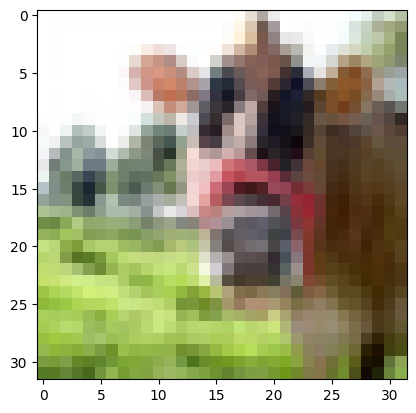

In [ ]:
print('Loading the Image from the Dataset in Image Form...')
def image_show(image, label):
    print('Label of image: ', train_loader.dataset.classes[label])
    plt.imshow(image.permute(1, 2, 0))
    plt.show()

image_show(image, label)


Label of image:  motorcycle


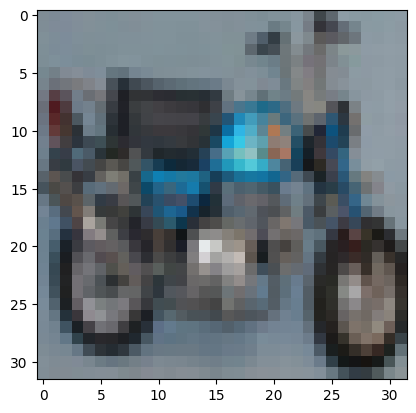

In [ ]:
image_show(*train_dataset[10000])

### **Showing A Few Images from the Dataset**

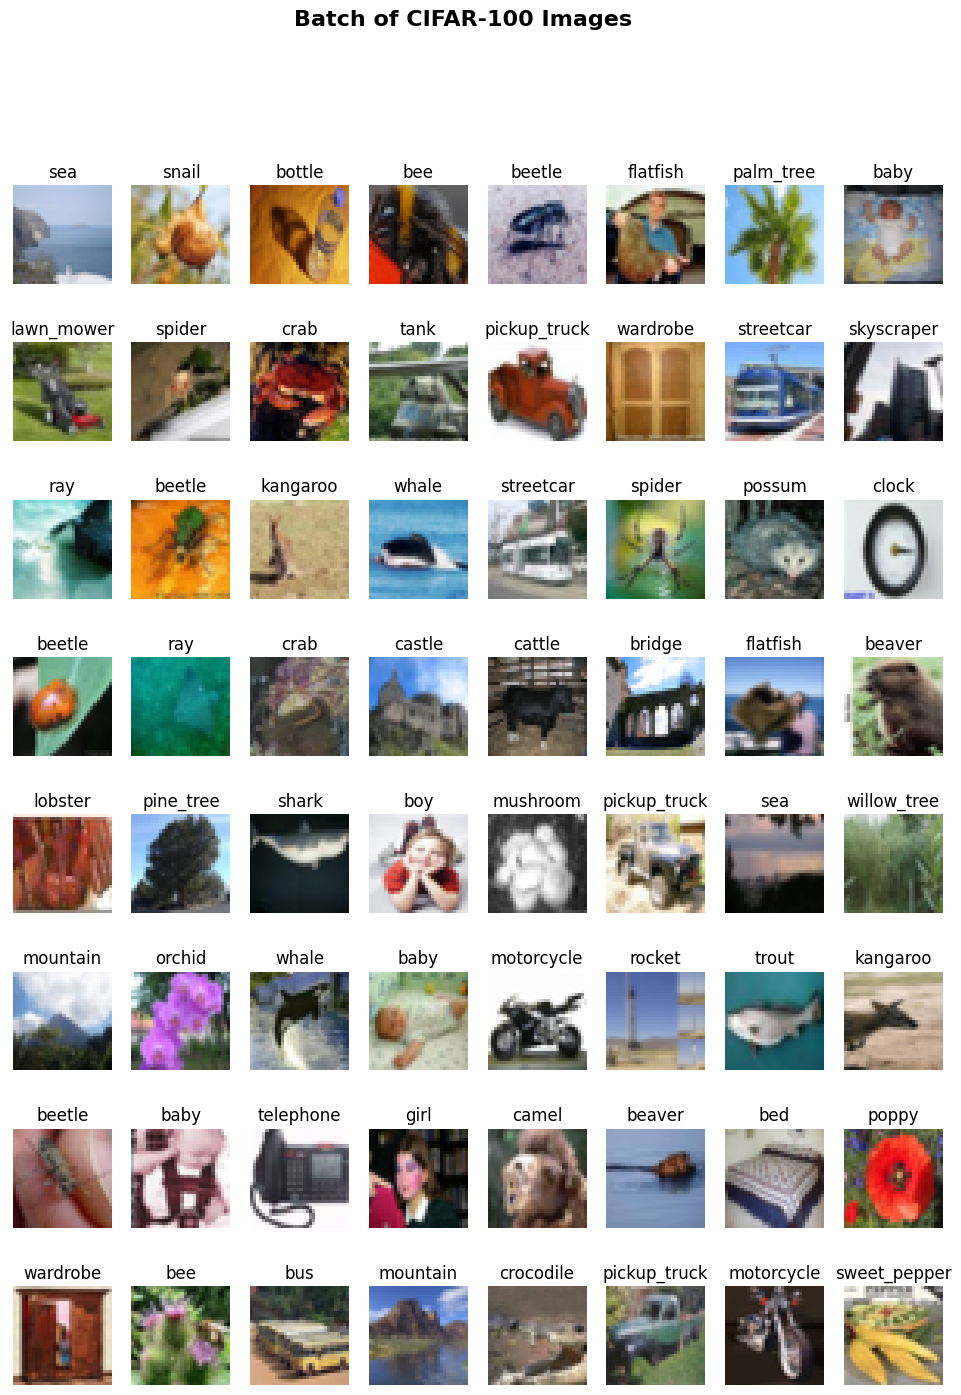

In [ ]:
# Defining Function to display images in a grid

def display_images(images, labels, classes):
    # Convert torch tensors to numpy ndarrays
    images_np = to_numpy(images)

    # Displaying the images in a grid
    fig, axes = plt.subplots(8, 8, figsize=(12, 16))
    fig.suptitle("Batch of CIFAR-100 Images", fontsize=16, fontweight="bold")

    for i in range(64):
        row = i // 8
        col = i % 8
        image = images_np[i].transpose(1, 2, 0)  # Changing the channel order (for Matplotlib)
        axes[row, col].imshow(image)
        axes[row, col].axis("off")
        axes[row, col].set_title(classes[labels[i]])

    plt.show()

# Function to convert torch tensors to numpy arrays
def to_numpy(tensor):
    return tensor.cpu().detach().numpy() if tensor.requires_grad else tensor.cpu().numpy() # Detaching the tensor copies it while the requirement of grad is turned off

# Image Batch from Train_Loader
images, labels = next(iter(train_loader))

display_images(images, labels, train_dataset.classes)


---
---

# **CNN**
### **without the Dense Connection**

In [ ]:
# Defining the Convolutional Neural Network

# ConvBlock Class
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, pool=False, dropout_rate=0.0):
        super().__init__()

        self.depthwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, groups=in_channels) # Depthwise convolution: Keeping in_channels and out_channels the same and using groups=in_channels

        self.pointwise_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1) # Pointwise convolution: Reducing the number of channels from in_channels to out_channels using 1x1 convolution

        self.bn1 = nn.BatchNorm2d(in_channels)  # Batch normalization layer for depthwise convolution
        self.bn2 = nn.BatchNorm2d(out_channels)  # Batch normalization layer for pointwise convolution

        self.relu1 = nn.ReLU() # Activation Function
        self.relu2 = nn.ReLU()

        self.dropout = nn.Dropout2d(p=dropout_rate) if dropout_rate > 0 else None # Applying Dropout if the dropout_rate is greater than 0

        self.pool = nn.MaxPool2d(2, 2) if pool else None # Max Pooling the Layer helps in reducing the size of the image

    def forward(self, x):
        x = self.depthwise_conv(x)
        x = self.bn1(x)  # Applying batch normalization after depthwise convolution
        x = self.relu1(x)

        x = self.pointwise_conv(x)
        x = self.bn2(x)  # Applying batch normalization after pointwise convolution
        x = self.relu2(x)

        if self.dropout is not None:
            x = self.dropout(x)

        if self.pool is not None:
            x = self.pool(x)

        return x


# === === === === === #


def ConvolutionalNetwork(dropout_rate=0.0): # 4 Convolutional Blocks and 2 Fully Connected Layers
    return nn.Sequential(
        ConvBlock(3, 32, pool=True, dropout_rate=dropout_rate),  # 32x32x3 -> 16x16x32
        ConvBlock(32, 64, pool=True, dropout_rate=dropout_rate),  # 16x16x32 -> 8x8x64
        ConvBlock(64, 128, pool=True, dropout_rate=dropout_rate),  # 8x8x64 -> 4x4x128
        ConvBlock(128, 256, pool=True, dropout_rate=dropout_rate),  # 4x4x128 -> 2x2x256

        nn.Flatten(),  # Flatten the output of the previous layer (ConvBlock)

        nn.Linear(2*2*256, 512),  # 2x2x256 -> 512 (fully connected layer)

        nn.ReLU(),

        nn.Dropout(dropout_rate) if dropout_rate > 0 else nn.Identity(), # Dropout layer

        nn.Linear(512, 100),  # 512 -> 100

        nn.LogSoftmax(dim=1)  # Softmax activation function for multiclass classification
    )


In [ ]:
def ConvolutionalNetwork(dropout_rate=0.0): # 3 Convolutional Blocks and 2 Fully Connected Layers
    return nn.Sequential(
        ConvBlock(3, 32, pool=True, dropout_rate=dropout_rate),  # 32x32x3 -> 16x16x32
        ConvBlock(32, 64, pool=True, dropout_rate=dropout_rate),  # 16x16x32 -> 8x8x64
        ConvBlock(64, 128, pool=True, dropout_rate=dropout_rate),  # 8x8x64 -> 4x4x128

        nn.Flatten(),  # Flatten the output of the previous layer
        nn.Linear(4*4*128, 512),  # 4x4x128 -> 512
        nn.ReLU(),

        nn.Dropout(dropout_rate) if dropout_rate > 0 else nn.Identity(), # Dropout layer

        nn.Linear(512, 100),  # 512 -> 100

        nn.LogSoftmax(dim=1)  # Softmax activation function
    )


### Model Initiation

In [ ]:
import torchsummary

model = ConvolutionalNetwork().to(device) # moving it to the cuda device
print(model)


Sequential(
  (0): ConvBlock(
    (depthwise_conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3)
    (pointwise_conv): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (relu2): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): ConvBlock(
    (depthwise_conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
    (pointwise_conv): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (relu2): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [ ]:
print(torchsummary.summary(model, (3, 32, 32))) # printing summary of the model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              30
       BatchNorm2d-2            [-1, 3, 32, 32]               6
              ReLU-3            [-1, 3, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]             128
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
         MaxPool2d-7           [-1, 32, 16, 16]               0
         ConvBlock-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]             320
      BatchNorm2d-10           [-1, 32, 16, 16]              64
             ReLU-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]           2,112
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

### Input Analysis

In [ ]:
# Shape of Input Image
image, labels = train_dataset[0]

print(image.size())


torch.Size([3, 32, 32])


In [ ]:
# Iterating through Train_Loader Object
detaiter = iter(train_loader)
images, labels = next(detaiter)

print(images.size())
# Here 64 is our batch size and 3, 32, 32 shows 3 channels and 32x32 image size

torch.Size([64, 3, 32, 32])


### HyperParameters

In [ ]:
# Hyper Parameters

# For Optimizer
learning_rate = 0.001
weight_decay = 0.0001

# Regularization
dropout_rate = 0.4

# Training Parameters
num_epochs = 15

### Loss Function, Optimizer and Scheduler

In [ ]:
# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay
)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)


---

### **Training, Validation and Testing**

Epoch 1/15, Train Loss: 3.5142, Train Accuracy: 16.77%, Val Loss: 3.1814, Val Accuracy: 22.42%
Epoch 2/15, Train Loss: 2.8163, Train Accuracy: 29.23%, Val Loss: 2.8426, Val Accuracy: 29.78%
Epoch 3/15, Train Loss: 2.5192, Train Accuracy: 35.06%, Val Loss: 2.6086, Val Accuracy: 34.46%
Epoch 4/15, Train Loss: 2.3359, Train Accuracy: 39.01%, Val Loss: 2.5365, Val Accuracy: 35.10%
Epoch 5/15, Train Loss: 2.1860, Train Accuracy: 42.40%, Val Loss: 2.4635, Val Accuracy: 37.28%
Epoch 6/15, Train Loss: 2.0739, Train Accuracy: 44.75%, Val Loss: 2.4742, Val Accuracy: 38.02%
Epoch 7/15, Train Loss: 1.9584, Train Accuracy: 47.53%, Val Loss: 2.4243, Val Accuracy: 38.90%
Epoch 8/15, Train Loss: 1.8694, Train Accuracy: 49.74%, Val Loss: 2.4688, Val Accuracy: 39.08%
Epoch 9/15, Train Loss: 1.7835, Train Accuracy: 51.71%, Val Loss: 2.4405, Val Accuracy: 39.30%
Epoch 10/15, Train Loss: 1.7064, Train Accuracy: 53.18%, Val Loss: 2.5213, Val Accuracy: 38.14%
Epoch 11/15, Train Loss: 1.6233, Train Accuracy: 

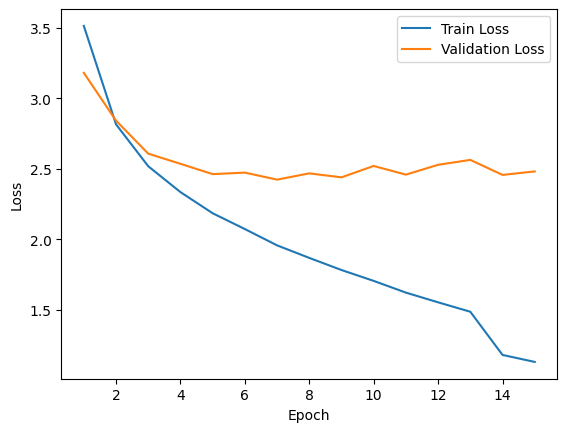

In [ ]:
def train(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs, device):

    # Set Training mode
    model.train()

    # Moving model to the cuda device
    model.to(device)

    # Best Validation Accuracy
    best_val_accuracy = 0.0

    # Best model parameters
    best_model_params = None

    # Number of epochs without improvement
    no_improvement = 0

    # Storing training and validation losses
    train_losses = []
    val_losses = []

    # Training loop

    for epoch in range(num_epochs):
        # Epoch loss
        epoch_loss = 0.0

        # Number of correct predictions
        num_correct = 0

        # Number of total examples
        num_examples = 0

        # Iterate over the training set
        for inputs, targets in train_loader:

            # Moving inputs and targets to the cuda device
            inputs, targets = inputs.to(device), targets.to(device)

            # making the gradients zero
            optimizer.zero_grad()

            # Forward pass / Compute the predictions
            outputs = model(inputs)

            # Loss computation
            loss = criterion(outputs, targets)

            # Backpropagation
            loss.backward()

            # Updating the model parameters
            optimizer.step()

            # Updating the epoch loss
            epoch_loss += loss.item()

            # Updating the number of correct predictions
            num_correct += (outputs.argmax(1) == targets).sum().item() # argmax as we are using LogSoftmax


            # Updating the number of examples
            num_examples += targets.size(0)

        # Computing the epoch loss
        epoch_loss /= len(train_loader)

        # Epoch accuracy
        epoch_accuracy = (num_correct / num_examples) * 100

        # Evaluation mode
        model.eval()

        # Validation loss
        val_loss = 0.0

        # Correct predictions
        num_correct = 0

        # Total number of examples
        num_examples = 0

        # Disable gradient computation

        with torch.no_grad():
            # Iterate over the validation set
            for inputs, targets in val_loader:

                # Moving the inputs and targets to the device
                inputs, targets = inputs.to(device), targets.to(device)

                # Forward pass
                outputs = model(inputs)

                # Loss computation
                loss = criterion(outputs, targets)

                # Updating the validation loss
                val_loss += loss.item()

                # Updating the number of correct predictions
                num_correct += (outputs.argmax(1) == targets).sum().item()

                # Updating the number of examples
                num_examples += targets.size(0)

        # Computing the validation loss
        val_loss /= len(val_loader)

        # Computing the validation accuracy
        val_accuracy = (num_correct / num_examples) * 100

        # Appending the losses for plotting
        train_losses.append(epoch_loss)
        val_losses.append(val_loss)

        # Print the epoch statistics
        print(f"Epoch {epoch + 1}/{num_epochs}, "
              f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Updating the learning rate
        scheduler.step(val_loss)

        # Checking if the validation accuracy improved

        if val_accuracy > best_val_accuracy:
            # Updating the best validation accuracy
            best_val_accuracy = val_accuracy

            # Updating the best model parameters
            best_model_params = model.state_dict()

            # Reset the number of epochs without improvement
            no_improvement = 0
        else:
            # Update the number of epochs without improvement
            no_improvement += 1

        # Checking if the model performance did not improve for five consecutive epochs
        if no_improvement > 5:
            print("Early stopping") # Early stopping if the model performance did not improve for five consecutive epochs
            break

        # Setting back to training mode
        model.train()

    # Loading the best model parameters
    model.load_state_dict(best_model_params)

    # Plotting the training and validation loss curves
    plt.plot(np.arange(1, epoch + 2), train_losses, label='Train Loss')
    plt.plot(np.arange(1, epoch + 2), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Return the best model
    return model

# Train the model (obtaining best model from the training function)
best_model = train(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs, device)


In [ ]:
# Calculating the final training accuracy
model.eval()
with torch.no_grad():
    correct_train = 0
    total_train = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()

final_train_accuracy = (correct_train / total_train) * 100

# Calculating final validation accuracy
model.eval()
with torch.no_grad():
    correct_val = 0
    total_val = 0
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_val += targets.size(0)
        correct_val += (predicted == targets).sum().item()

final_val_accuracy = (correct_val / total_val) * 100

# Printing final accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

Final Training Accuracy: 71.69%
Final Validation Accuracy: 41.78%


In [ ]:


# Setting the best model to evaluation mode
best_model.eval()

# Initializing the number of correct predictions
num_correct = 0

# Initializing the number of predictions
num_predictions = 0

# Disabling the gradient computation for prediction
with torch.no_grad():
    # Iterating over the test set
    for inputs, targets in test_loader:
        # Moving the inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = best_model(inputs)

        # Updating the number of correct predictions
        num_correct += (outputs.argmax(1) == targets).sum().item()

        # Updating the number of examples
        num_predictions += targets.size(0)

# Compute the test accuracy
test_accuracy = (num_correct / num_predictions) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

torch.save(best_model.state_dict(), "best_model.pth")


model = ConvolutionalNetwork().to(device)
model.load_state_dict(torch.load("best_model.pth"))


model.eval()

# Initialize the number of correct predictions
num_correct = 0

# Initialize the number of predictions
num_predictions = 0

# Disabling gradient computation
with torch.no_grad():
    # Iterating over the test set
    for inputs, targets in test_loader:
        # Moving inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass / Compute the predictions
        outputs = model(inputs)

        # Updating the number of correct predictions
        num_correct += (outputs.argmax(1) == targets).sum().item()

        # Updating the number of examples
        num_predictions += targets.size(0)

# Computing the test accuracy
test_accuracy = (num_correct / num_predictions) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 41.34%
Test Accuracy: 41.34%


Files already downloaded and verified


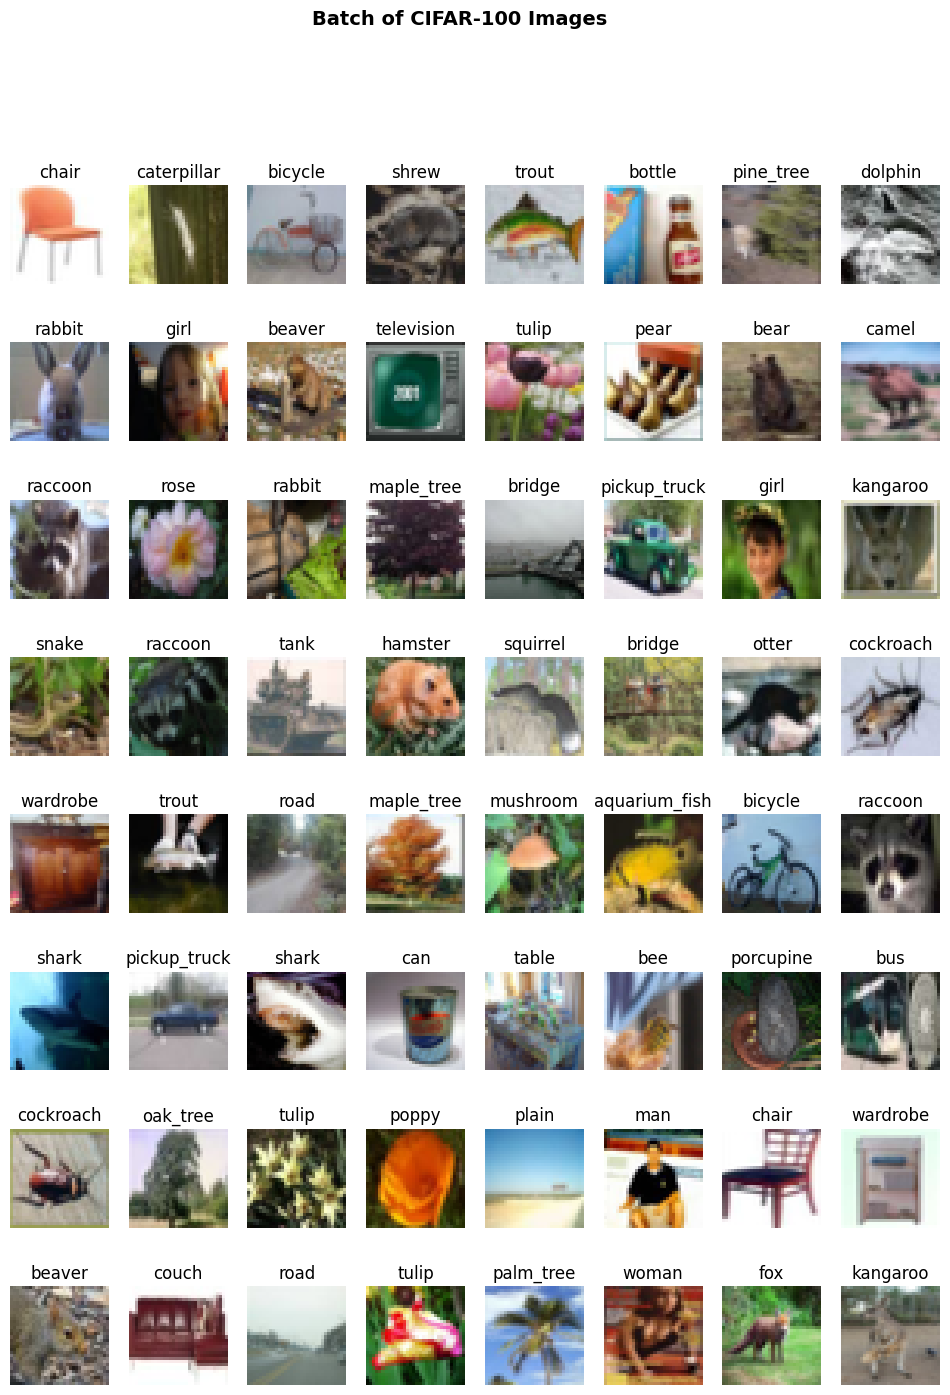

Predicted: chair, caterpillar, snake, beaver, trout, bottle, otter, crocodile, squirrel, couch, beaver, television, girl, pear, kangaroo, camel, bear, rose, tulip, maple_tree, bridge, lawn_mower, bear, mouse, beaver, aquarium_fish, tank, snail, shrew, forest, chimpanzee, beetle, wardrobe, trout, road, maple_tree, mushroom, aquarium_fish, bicycle, wolf, whale, pickup_truck, turtle, can, spider, caterpillar, porcupine, raccoon, beetle, oak_tree, tulip, poppy, plain, bee, chair, wardrobe, leopard, couch, sea, lawn_mower, palm_tree, tractor, cattle, kangaroo
Ground Truth: chair, caterpillar, bicycle, shrew, trout, bottle, pine_tree, dolphin, rabbit, girl, beaver, television, tulip, pear, bear, camel, raccoon, rose, rabbit, maple_tree, bridge, pickup_truck, girl, kangaroo, snake, raccoon, tank, hamster, squirrel, bridge, otter, cockroach, wardrobe, trout, road, maple_tree, mushroom, aquarium_fish, bicycle, raccoon, shark, pickup_truck, shark, can, table, bee, porcupine, bus, cockroach, oak_

In [ ]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

test_loader_2 = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)

# Function to display images using Matplotlib
def display_images(images, labels, classes):
    # Convert torch tensors to numpy arrays
    images_np = to_numpy(images)

    # Display images in a grid
    fig, axes = plt.subplots(8, 8, figsize=(12, 16))
    fig.suptitle("Batch of CIFAR-100 Images", fontsize=14, fontweight="bold")

    for i in range(64):
        row = i // 8
        col = i % 8
        img = images_np[i].transpose(1, 2, 0)  # Change channel order for Matplotlib
        axes[row, col].imshow(img)
        axes[row, col].axis("off")
        axes[row, col].set_title(classes[labels[i]])

    plt.show()

# Batch of images from the test loader
images, labels = next(iter(test_loader))

# Displaying the images
display_images(images, labels, test_loader_2.dataset.classes)

# Moving the images to the device
images = images.to(device)

# Forward pass
outputs = model(images)

# Get the predicted classes
_, predicted = torch.max(outputs, 1)

# Display the predicted classes
print("Predicted:", ", ".join(test_dataset.classes[predicted[j]] for j in range(64)))

# Display the ground-truth classes
print("Ground Truth:", ", ".join(test_dataset.classes[labels[j]] for j in range(64)))

In [ ]:
from sklearn.metrics import classification_report

# Set the model to the evaluation mode
best_model.eval()

# Storing the true labels and predicted labels
true_labels = []
predicted_labels = []

# Disabling gradient computation
with torch.no_grad():
    # Iterating over the test set
    for inputs, targets in test_loader_2:
        # Moving the inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = best_model(inputs)

        # Getting the predicted classes
        _, predicted = torch.max(outputs, 1)

        # Appending the true labels and predicted labels to the lists
        true_labels.extend(targets.tolist())
        predicted_labels.extend(predicted.tolist())

# Classification report
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.62      0.70      0.66       100
           1       0.43      0.43      0.43       100
           2       0.34      0.31      0.32       100
           3       0.22      0.21      0.22       100
           4       0.19      0.26      0.22       100
           5       0.38      0.34      0.36       100
           6       0.44      0.43      0.43       100
           7       0.43      0.45      0.44       100
           8       0.55      0.48      0.51       100
           9       0.57      0.60      0.59       100
          10       0.46      0.24      0.32       100
          11       0.33      0.24      0.28       100
          12       0.40      0.40      0.40       100
          13       0.36      0.40      0.38       100
          14       0.33      0.28      0.30       100
          15       0.26      0.31      0.28       100
          16       0.49      0.40      0.44       100
          17       0.57    

---
---

### **CNN DenseNet**

### Defining the Model

In [ ]:
# Dense Net Model with 3 Convolutional Blocks with each conv block having a depthwise and a pointwise convolution

# Each layer outputs k-feature maps, k is the growth factor
# BottleNeck layer of 1x1 followed by 3x3 convolutions - 1x1 convolutions output 4k feature maps
# Initial Conv Layer outputs 4k Featue Maps

# Transition Block 1 is the initial conv layer which has a conv2d layer with a stride, batch norm and relu and max_pooling layer then it goes to a dense block

# Let's implement the model

class DepthwiseSeparableConv(nn.Module): # Depthwise Separable Convolution
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu1 = nn.ReLU()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, stride=stride, padding=padding, groups=in_channels)

        self.bn2 = nn.BatchNorm2d(in_channels) # After the depthwise convolution
        self.relu2 = nn.ReLU() # Activate Function

        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1) # PointWise Convolution


    def forward(self, x):
        x = self.bn1(x) # Batch Normalization
        x = self.relu1(x) # Activation Function
        x = self.depthwise(x) # Depthwise Convolution
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pointwise(x) # PointWise Convolution

        return x # Returning the output

# === === === === === #

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for _ in range(num_layers):
            self.layers.append(DepthwiseSeparableConv(in_channels, growth_rate))
            in_channels += growth_rate

    def forward(self, x):
        features = [x]
        for layer in self.layers:
            out = layer(torch.cat(features, dim=1))
            features.append(out)
        return torch.cat(features, dim=1)

# === === === === === #

class TransitionBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionBlock, self).__init__()
        self.conv = DepthwiseSeparableConv(in_channels, out_channels)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2) # AvgPool2d Layer

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        return x

# === === === === === #


class DenseNet(nn.Module):
    def __init__(self, growth_rate=12, block_config=(16, 16, 16), num_classes=100):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 2*growth_rate, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(2*growth_rate),
            nn.ReLU(inplace=True)
        )
        in_channels = 2*growth_rate
        for i, num_layers in enumerate(block_config):
            block = DenseBlock(in_channels, growth_rate, num_layers)
            self.features.add_module(f"DenseBlock{i+1}", block)
            in_channels += num_layers * growth_rate
            if i != len(block_config) - 1:
                transition = TransitionBlock(in_channels, in_channels // 2)
                self.features.add_module(f"TransitionBlock{i+1}", transition)
                in_channels = in_channels // 2
        self.features.add_module("norm5", nn.BatchNorm2d(in_channels))
        self.classifier = nn.Linear(in_channels, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = F.relu(x, inplace=True)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Create an instance of DenseNet for CIFAR100
model = DenseNet(growth_rate=12, block_config=(16, 16, 16), num_classes=100)

# Move the model to the device
model.to(device)

# Print the model architecture
print(model)

# Summary of the model
print(torchsummary.summary(model, (3, 32, 32)))

# But this keeps on running and takes a lot of time as it's quite large and the number of parameters are large as well


DenseNet(
  (features): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (DenseBlock1): DenseBlock(
      (layers): ModuleList(
        (0): DepthwiseSeparableConv(
          (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU()
          (depthwise): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=24)
          (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU()
          (pointwise): Conv2d(24, 12, kernel_size=(1, 1), stride=(1, 1))
        )
        (1): DepthwiseSeparableConv(
          (bn1): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU()
          (depthwise): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers, bottleneck=True):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for _ in range(num_layers):
            if bottleneck:
                self.layers.append(nn.Sequential(
                    nn.BatchNorm2d(in_channels),
                    nn.ReLU(),
                    nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, stride=1, padding=0, bias=False),
                    nn.BatchNorm2d(4 * growth_rate),
                    nn.ReLU(),
                    DepthwiseSeparableConv(4 * growth_rate, growth_rate)
                ))
                in_channels += growth_rate
            else:
                self.layers.append(DepthwiseSeparableConv(in_channels, growth_rate))
                in_channels += growth_rate

    def forward(self, x):
        features = [x]
        for layer in self.layers:
            out = layer(torch.cat(features, dim=1))
            features.append(out)
        return torch.cat(features, dim=1)

# === === === === === #

class TransitionBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        return self.conv(x)

# === === === === === #

class DenseNet(nn.Module):
    def __init__(self, growth_rate=12, block_config=(16, 16, 16), bottleneck=True, num_classes=100):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 2*growth_rate, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(2*growth_rate),
            nn.ReLU()
        )
        in_channels = 2*growth_rate
        for i, num_layers in enumerate(block_config):
            block = DenseBlock(in_channels, growth_rate, num_layers, bottleneck)
            self.features.add_module(f"DenseBlock{i+1}", block)
            in_channels += num_layers * growth_rate
            if i != len(block_config) - 1:
                transition = TransitionBlock(in_channels, in_channels // 2)
                self.features.add_module(f"TransitionBlock{i+1}", transition)
                in_channels = in_channels // 2
        self.features.add_module("norm5", nn.BatchNorm2d(in_channels))
        self.classifier = nn.Linear(in_channels, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = F.relu(x, inplace=True)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Creating an instance of DenseNet
model = DenseNet(growth_rate=12, block_config=(16, 16, 16), bottleneck=True, num_classes=100)

# Moving the model to the device
model.to(device)

# Printing the model architecture
print(model)

# Summary of the model
print(torchsummary.summary(model, (3, 32, 32)))



DenseNet(
  (features): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (DenseBlock1): DenseBlock(
      (layers): ModuleList(
        (0): Sequential(
          (0): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
          (2): Conv2d(24, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU()
          (5): DepthwiseSeparableConv(
            (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu1): ReLU()
            (depthwise): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48)
            (bn2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           

In [ ]:
class DenseNet(nn.Module):
    def __init__(self, growth_rate=12, block_config=(16, 16, 16), bottleneck=True, num_classes=100):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 2*growth_rate, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(2*growth_rate),
            nn.ReLU()
        )
        in_channels = 2 * growth_rate
        for i, num_layers in enumerate(block_config[:3]):  # Keeping only the first 3 elements
            block = DenseBlock(in_channels, growth_rate, num_layers, bottleneck)
            self.features.add_module(f"DenseBlock{i + 1}", block)
            in_channels += num_layers * growth_rate
            if i != 2:  # Adding the transition block after the first two dense blocks
                transition = TransitionBlock(in_channels, in_channels // 2)
                self.features.add_module(f"TransitionBlock{i + 1}", transition)
                in_channels = in_channels // 2
        self.features.add_module("norm5", nn.BatchNorm2d(in_channels))
        self.classifier = nn.Linear(in_channels, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = F.relu(x, inplace=True)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Create an instance of DenseNet with 3 dense blocks for quicker training and lesser number of parameters
model = DenseNet(growth_rate=12, block_config=(16, 16, 16), bottleneck=True, num_classes=100)

# Move the model to the device
model.to(device)

# Print the model architecture
print(model)

# Summary of the model
print(torchsummary.summary(model, (3, 32, 32)))


DenseNet(
  (features): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (DenseBlock1): DenseBlock(
      (layers): ModuleList(
        (0): Sequential(
          (0): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
          (2): Conv2d(24, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU()
          (5): DepthwiseSeparableConv(
            (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu1): ReLU()
            (depthwise): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48)
            (bn2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           

Epoch 1/5, Train Loss: 2.0909, Train Accuracy: 43.06%, Val Loss: 2.0761, Val Accuracy: 43.78%
Epoch 2/5, Train Loss: 1.8156, Train Accuracy: 49.37%, Val Loss: 1.8683, Val Accuracy: 49.38%
Epoch 3/5, Train Loss: 1.6263, Train Accuracy: 54.34%, Val Loss: 1.7308, Val Accuracy: 52.80%
Epoch 4/5, Train Loss: 1.4729, Train Accuracy: 57.74%, Val Loss: 1.6933, Val Accuracy: 52.90%
Epoch 5/5, Train Loss: 1.3374, Train Accuracy: 61.38%, Val Loss: 1.6212, Val Accuracy: 55.54%


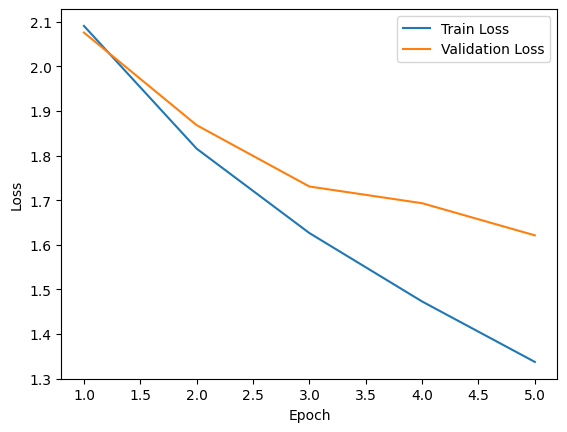

Final Training Accuracy: 66.46%
Final Validation Accuracy: 55.54%
Test Accuracy: 55.64%


In [ ]:
# let's train the model using train_loader, val_loader and test using test_loader, we also plot the training and validation loss curves

# Hyper Parameters
lr = 0.001
weight_decay = 0.0001
dropout_rate = 0.2
num_epochs = 5 # Reduced the number of epochs to 7

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Train the model
best_model = train(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs, device)

# Calculate final training accuracy
model.eval()
with torch.no_grad():
    correct_train = 0
    total_train = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()

final_train_accuracy = (correct_train / total_train) * 100

# Calculate final validation accuracy
model.eval()
with torch.no_grad():
    correct_val = 0
    total_val = 0
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_val += targets.size(0)
        correct_val += (predicted == targets).sum().item()

final_val_accuracy = (correct_val / total_val) * 100

# Print final accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

# Set the best model to evaluation mode
best_model.eval()

# Initialize the number of correct predictions
num_correct = 0

# Initialize the number of examples
num_examples = 0

# Disable gradient computation

with torch.no_grad():
    # Iterate over the test set
    for inputs, targets in test_loader:
        # Move inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = best_model(inputs)

        # Update the number of correct predictions
        num_correct += (outputs.argmax(1) == targets).sum().item()

        # Update the number of examples
        num_examples += targets.size(0)

# Compute the test accuracy
test_accuracy = (num_correct / num_examples) * 100

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Save the best model
torch.save(best_model.state_dict(), "best_model.pth")

# Load the best model
model = DenseNet(growth_rate=12, block_config=(16, 16, 16), bottleneck=True, num_classes=100)
model.load_state_dict(torch.load("best_model.pth"))


Files already downloaded and verified
Test Accuracy: 55.59%


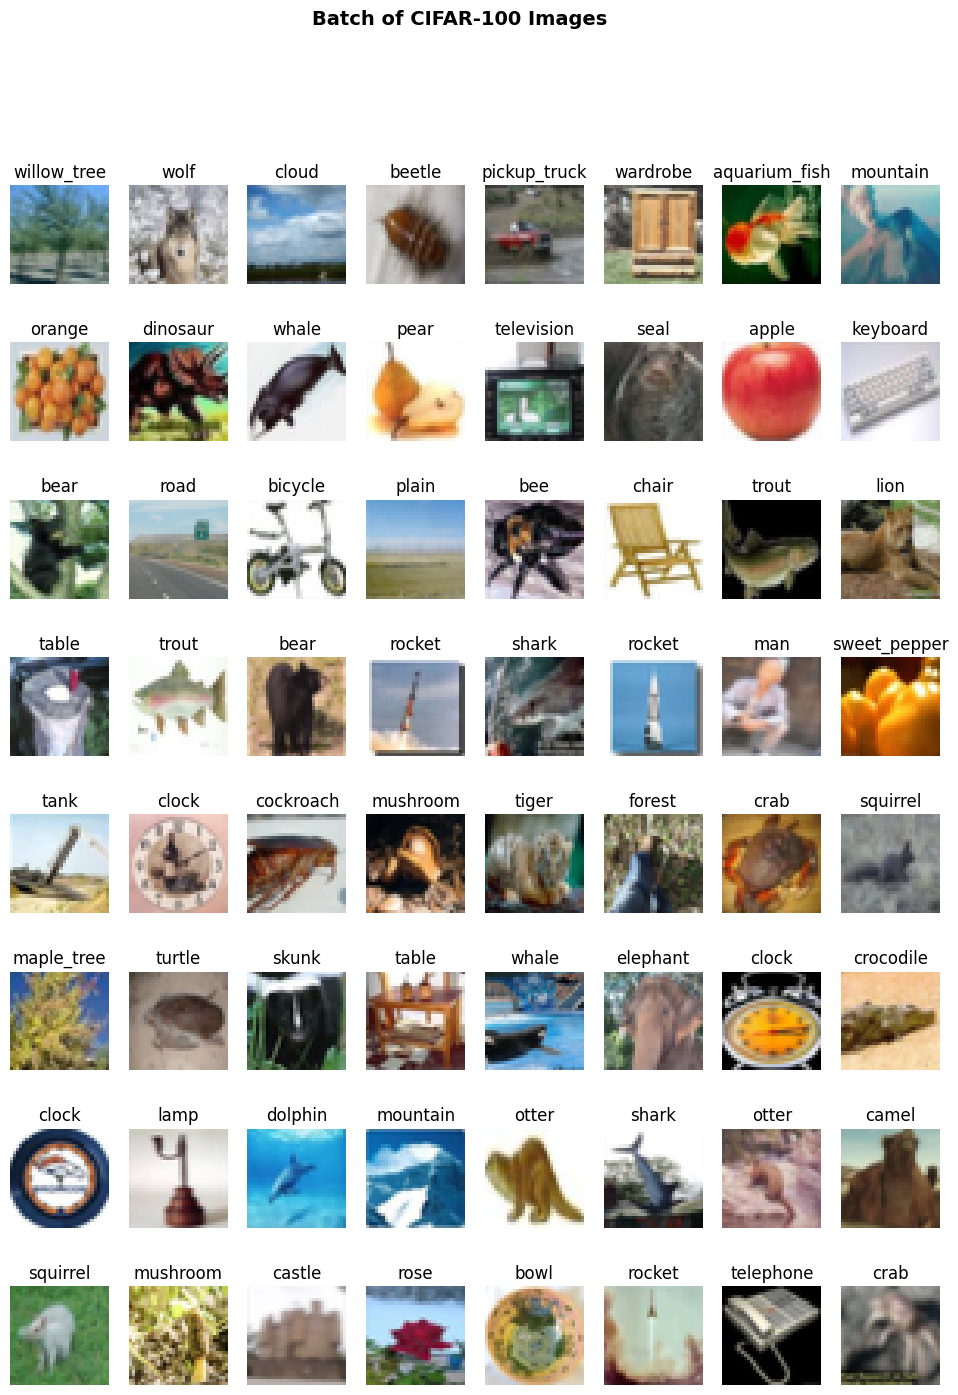

Predicted: pine_tree, wolf, cloud, caterpillar, pickup_truck, wardrobe, aquarium_fish, shark, hamster, chimpanzee, whale, pear, television, beaver, apple, keyboard, bear, road, motorcycle, plain, fox, chair, trout, lion, clock, trout, bear, rocket, shark, rocket, fox, orange, bridge, tank, crab, possum, squirrel, chimpanzee, mouse, otter, turtle, mouse, cattle, bed, shark, wolf, bowl, crocodile, clock, bottle, dolphin, mountain, mouse, tank, mouse, cattle, rabbit, beetle, castle, rose, bowl, rocket, worm, wolf
Ground Truth: willow_tree, wolf, cloud, beetle, pickup_truck, wardrobe, aquarium_fish, mountain, orange, dinosaur, whale, pear, television, seal, apple, keyboard, bear, road, bicycle, plain, bee, chair, trout, lion, table, trout, bear, rocket, shark, rocket, man, sweet_pepper, tank, clock, cockroach, mushroom, tiger, forest, crab, squirrel, maple_tree, turtle, skunk, table, whale, elephant, clock, crocodile, clock, lamp, dolphin, mountain, otter, shark, otter, camel, squirrel, mu

In [ ]:

model.to(device)
# Setting the model to evaluation mode
model.eval()

# Initializing the number of correct predictions
num_correct = 0

# Initializing the number of examples
num_predictions = 0

test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)

# Disabling gradient computation
with torch.no_grad():
    # Iterating over the test set
    for inputs, targets in test_loader:
        # Moving the inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)

        # Updating the number of correct predictions
        num_correct += (outputs.argmax(1) == targets).sum().item()

        # Update the number of examples
        num_predictions += targets.size(0)

# Compute the test accuracy
test_accuracy = (num_correct / num_predictions) * 100

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Function to display images using Matplotlib
def display_images(images, labels, classes):
    # Converting torch tensors to numpy arrays
    images_np = to_numpy(images)

    # Displaying images in a grid
    fig, axes = plt.subplots(8, 8, figsize=(12, 16))
    fig.suptitle("Batch of CIFAR-100 Images", fontsize=14, fontweight="bold")

    for i in range(64):
        row = i // 8
        col = i % 8
        img = images_np[i].transpose(1, 2, 0)  # Change channel order for Matplotlib (3, 32, 32) -> (32, 32, 3)
        axes[row, col].imshow(img)
        axes[row, col].axis("off")
        axes[row, col].set_title(classes[labels[i]])

    plt.show()

# Batch of images from the test loader
images, labels = next(iter(test_loader))

# Displaying the images using Matplotlib
display_images(images, labels, test_loader.dataset.classes)

# Moving the images to the device
images = images.to(device)

# Forwarding pass
outputs = model(images)

# Getting the predicted classes
_, predicted = torch.max(outputs, 1)

#  predicted classes
print("Predicted:", ", ".join(test_loader.dataset.classes[predicted[j]] for j in range(64)))

#  ground-truth classes
print("Ground Truth:", ", ".join(test_loader.dataset.classes[labels[j]] for j in range(64)))

from sklearn.metrics import classification_report

# Move the model to the evaluation mode
model.eval()

# Storing the true labels and predicted labels
true_labels = []
predicted_labels = []

# Disabling gradient computation
with torch.no_grad():
    # Iterating over the test set
    for inputs, targets in test_loader:
        # Moving inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get the predicted classes
        _, predicted = torch.max(outputs, 1)

        # Append the true labels and predicted labels to the lists
        true_labels.extend(targets.tolist())
        predicted_labels.extend(predicted.tolist())

# classification report
print(classification_report(true_labels, predicted_labels))



---
---


### **Comparing**

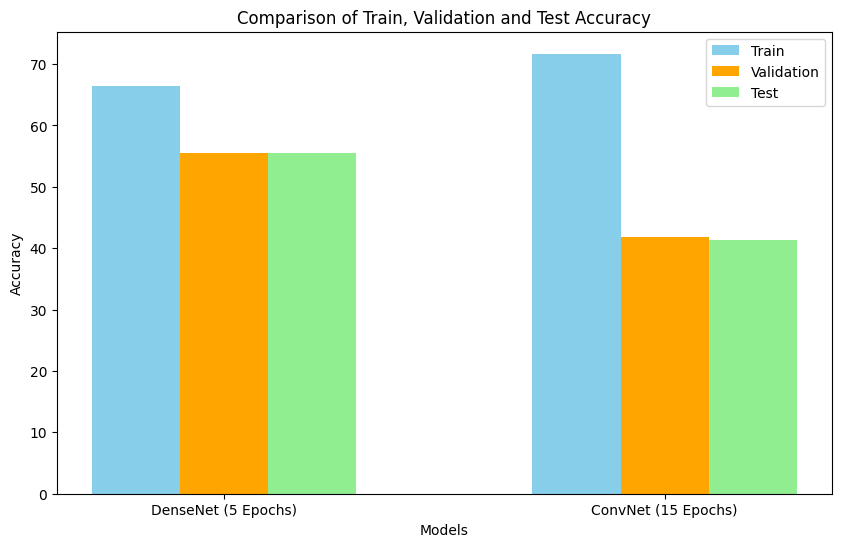

In [ ]:
# Comparing the Two Models

# DenseNet Model
# Final Testing Accuracy: 55.59%
# Final Training Accuracy: 66.46%
# Final Validation Accuracy: 55.54%


# ConvNet without dense blocks
# Final Testing Accuracy: 41.34%
# Final Training Accuracy: 71.69%
# Final Validation Accuracy: 41.78%

# Plotting the Comparison Bar Graph of Train Test and Validation Accuracy

import matplotlib.pyplot as plt

# Data that we got from earlier
models = ["DenseNet (5 Epochs)", "ConvNet (15 Epochs)"]
train_accuracies = [66.46, 71.69]
val_accuracies = [55.54, 41.78]
test_accuracies = [55.59, 41.34]

# Plotting the Comparison
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = [0, 1]
ax.bar(index, train_accuracies, bar_width, label="Train", color="skyblue")
ax.bar([i + bar_width for i in index], val_accuracies, bar_width, label="Validation", color="orange")
ax.bar([i + 2 * bar_width for i in index], test_accuracies, bar_width, label="Test", color="lightgreen")
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Train, Validation and Test Accuracy")
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()
plt.show()


**We see that the DenseNet performs better than ConvNet without Dense Connections and converges quite faster as the flow of gradients gets much more flow in the Network thus helping it learn better**

---

### **ThankYou :D**